In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
def f1(x):
    x,y,z = x
    return (x - z)**2 + (2*y + z)**2 + (4*x - 2*y + z)**2 + x + y

def grad_f1(x):
    x,y,z = x[0], x[1], x[2]
    dx = 2*(x - z) + 8*(4*x - 2*y + z) + 1
    dy = 4*(2*y + z) - 4*(4*x - 2*y + z) + 1
    dz = -2*(x - z) + 2*(2*y + z) + 2*(4*x - 2*y + z)
    
    return np.array([dx, dy, dz])

def hess_f1(x):
    dxx = 34 # 2 + 32
    dxy = -16
    dxz = 6 #-2 + 8
    dyy = 16
    dyz = 0
    dzz = 6
    
    return np.array([[dxx, dxy, dxz], [dxy, dyy, dyz], [dxz, dyz, dzz]])

In [4]:
f1_x1 = np.array([0,0,0]) 
f1(f1_x1), grad_f1(f1_x1), hess_f1(f1_x1)

(np.int64(0),
 array([1, 1, 0]),
 array([[ 34, -16,   6],
        [-16,  16,   0],
        [  6,   0,   6]]))

In [5]:
def f2(x):
    x,y,z = x
    return (x - 1)**2 + (y - 1)**2 + 100*(y-x**2)**2 + 100*(z-y**2)**2

def grad_f2(x):
    x,y,z = x[0], x[1], x[2]
    dx = 2*x - 2 - 400 * x * y + 400 * x**3
    dy = 2*y - 2 + 200 * (y - x**2) - 400*z*y + 400 * y**3
    dz = 200 * (z - y**2)
        
    return np.array([dx, dy, dz])

def hess_f2(x):
    x,y,z = x[0], x[1], x[2]
    
    dxx = 2 - 400 * y + 1200 * x**2
    dxy = -400 * x
    dxz = 0
    dyy = 2 + 200 - 400 * z + 1200 * y**2
    dyz = -400 * y
    dzz = 200
    return np.array([[dxx, dxy, dxz], [dxy, dyy, dyz], [dxz, dyz, dzz]])

In [6]:
f2_x1 = np.array([1.2, 1.2, 1.2])
f2(f2_x1), grad_f2(f2_x1), hess_f2(f2_x1)

(np.float64(11.6),
 array([115.6,  67.6, -48. ]),
 array([[1250., -480.,    0.],
        [-480., 1450., -480.],
        [   0., -480.,  200.]]))

In [7]:
def f3(x):
    x,y = x
    return (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

def grad_f3(x):
    x,y = x[0], x[1]
    
    dx = -12.75 * 6*x + 3*y - 4*x*y - 2*x*y**2 + 4.5*y**2 + 2*x*y**4 - 4*x*y**3 + 5.25 * y**3 + 2*x*y**6
    dy = 3*x + 9*y*x - 4*x**2*y - 2*x**2 + 15.75*y**2 *x + 2*x**2 * y - 6 * x**2 * y**2 + 4*x**3*y**3 + 6*x**2*y**5
    
    return np.array([dx, dy])

def hess_f3(x):
    x,y = x[0], x[1]
    
    dxx = 6 - 4*y - 2*y**2 + 2*y**4 - 4*y**3 + 2*y**6
    dxy = 3 - 4*x - 4*x*y + 9*y + 8*x*y**3 - 12*x*y**2 + 15.75*y**2 + 12*x*y**5
    dyy = 9*x - 4*x**2 + 31.5*y*x + 2*x**2 - 12*x**2*y + 12*x**2*y**2 + 30*x**2*y**4
    return np.array([[dxx, dxy], [dxy, dyy]])

In [8]:
f3_x1 = np.array([1,1])
f3(f3_x1), grad_f3(f3_x1), hess_f3(f3_x1)

(np.float64(14.203125),
 array([-69.75,  27.75]),
 array([[ 0.  , 27.75],
        [27.75, 68.5 ]]))

In [9]:
def learning_rate(i):
    return 0.01 * 0.99**i

In [10]:
def gd(x, grad_f, lr_fn, n_steps, t=None):
    
    if t is not None:
        i = 0
        start = time.time()
        while time.time() - start < t:
            x = x - lr_fn(i) * grad_f(x)
            i += 1
    else:
        for i in range(n_steps):
            x = x - lr_fn(i) * grad_f(x)
        
    return x 
    

In [11]:
def polyak(x: np.ndarray, grad_f, lr_fn, mu, n_steps, t=None):
    x_prev = x
    
    if t is not None:
        start = time.time()
        i = 0
        while time.time() - start < t:
            dx = grad_f(x)
            x = x - lr_fn(i) * dx  + mu * (x - x_prev)
        
            x_prev = x
            i+=1
    else:
        for i in range(n_steps):
            dx = grad_f(x)
            x = x - lr_fn(i) * dx  + mu * (x - x_prev)
            
            x_prev = x
        
    return x

In [12]:
def nesterov(x, f, grad_f, lr_fn, mu, n_steps, t=None):
    x_prev = x
    
    if t is not None:
        start = time.time()
        i = 0
        while time.time() - start < t:
            dx = grad_f(x + mu * (x - x_prev))
            x = x - lr_fn(i) * dx + mu * (x_prev - x)
        
            x_prev = x
            i+=1
    else:
        for i in range(n_steps):
            dx = grad_f(x + mu * (x - x_prev))
            x = x - lr_fn(i) * dx + mu * (x_prev - x)
            
            x_prev = x
        
    return x

In [13]:
def adagrad(x, grad_f, lr_fn, n_steps, eps=1e-8, t=None):
    x = np.array(x, dtype=float)
    n = len(x)
    
    grad_sq_sum = np.zeros(n)
    
     
    if t is not None:
        start = time.time()
        i = 0
        while time.time() - start < t:
            grad = np.array(grad_f(x))
        
            # Accumulate squared gradients
            grad_sq_sum += grad ** 2
            
            # Compute D_k^{-1/2}
            D_inv_sqrt = np.diag(1.0 / (np.sqrt(grad_sq_sum) + eps))
            
            # Adaptive step
            step = lr_fn(i) * D_inv_sqrt @ grad
            x_new = x - step
            
            x = x_new
            i+= 1
    else:
        for i in range(n_steps):
            grad = np.array(grad_f(x))
            
            # Accumulate squared gradients
            grad_sq_sum += grad ** 2
            
            # Compute D_k^{-1/2}
            D_inv_sqrt = np.diag(1.0 / (np.sqrt(grad_sq_sum) + eps))
            
            # Adaptive step
            step = lr_fn(i) * D_inv_sqrt @ grad
            x_new = x - step
            
            x = x_new

    return x


In [14]:
f1(adagrad(f1_x1, grad_f1, learning_rate, 100))

np.float64(-0.15969334544827538)

Newton and BFGS

In [15]:
import numpy as np

def is_positive_definite(H):
    try:
        np.linalg.cholesky(H)
        return True
    except np.linalg.LinAlgError:
        return False


In [16]:
def newton(x0, grad_f, hess_f, n_steps=100, t=None, lr=None):
    x = np.array(x0, dtype=float)
    
    if t is not None:
        start = time.time()
        i = 0
        while time.time() - start < t:
            grad = np.array(grad_f(x))
            hess = np.array(hess_f(x))
            
            hess_inv = np.linalg.inv(hess)
            
            lr = lr if lr is not None else learning_rate(i)
            # Compute Newton step
            x = x - learning_rate(i) * hess_inv @ grad
            i += 1

    else:
        for i in range(n_steps):
            grad = np.array(grad_f(x))
            grad = np.clip(grad, -10, 10)

            hess = np.array(hess_f(x)) + 1e-4 * np.eye(len(x))
            
            hess_inv = np.linalg.inv(hess)
            
            # Compute Newton step
            x = x - hess_inv @ grad
        
    return x

In [42]:
minimum3(f2), print("Newton: ", f2(newton(np.array([0,0,0]), grad_f1, hess_f1, 100)))


Newton:  10.777012954523533


(array([1., 1., 1., 0.]), None)

In [19]:
def sgd(x, grad_f, lr_fn, n_steps=100, t=None):
    x = np.array(x, dtype=float)

    for i in range(n_steps):
        grad = grad_f(x) 
        x = x - lr_fn(i) * grad

    return x


### BFGS

In [138]:
def bfgs(x, grad_f, lr_fn, n_steps, t=None):
    B = np.eye(len(x)) * 0.0001
    grad = grad_f(x)

    for i in range(n_steps):
        x_new = x - B @ grad
        grad_new = grad_f(x_new)

        delta = (x_new - x).reshape((-1, 1))
        gamma = (grad_new - grad).reshape((-1, 1))
        rho = 1.0 / (delta.T @ gamma)

        if np.isfinite(rho) and rho > 0:
            I = np.eye(len(x))
            B = (I - rho * delta @ gamma.T) @ B @ (I - rho * gamma @ delta.T) + rho * delta @ delta.T

        x, grad = x_new, grad_new
        print(f"x: {x.flatten()}, grad norm: {np.linalg.norm(grad)}")

    return x


In [139]:
bfgs(np.array([1,0,0]), grad_f1, hess_f1, 100), minimum3(f1)


x: [ 9.965e-01  1.500e-03 -6.000e-04], grad norm: 38.38061094771682
x: [ 0.1970345   0.34373421 -0.13766342], grad norm: 3.6355145084048957
x: [ 0.19683472  0.34342622 -0.13770975], grad norm: 3.6329667270874513
x: [-0.03220376 -0.08872086 -0.19311509], grad norm: 1.3654158770052056
x: [-0.03092996 -0.09073154 -0.19280275], grad norm: 1.3649438631310555
x: [-0.02975393 -0.09263503 -0.1922545 ], grad norm: 1.3692643543515144
x: [-0.02783246 -0.09642315 -0.19055679], grad norm: 1.3898917204806442
x: [-0.02557648 -0.10282014 -0.18626188], grad norm: 1.4505395613916403
x: [-0.02373176 -0.11468055 -0.17492248], grad norm: 1.6078827525291324
x: [-0.02555418 -0.13606992 -0.14703653], grad norm: 1.9225510592743007
x: [-0.03917976 -0.17236634 -0.08450469], grad norm: 2.347624819305254
x: [-0.07626491 -0.2203837   0.02574462], grad norm: 2.4809943421590726
x: [-0.13089408 -0.25316616  0.14334218], grad norm: 1.7471987250292211
x: [-0.16508769 -0.24835257  0.18703895], grad norm: 0.60076219343076

C:\Users\sebas\AppData\Local\Temp\ipykernel_8464\3924494986.py:11: RuntimeWarning: divide by zero encountered in divide
  rho = 1.0 / (delta.T @ gamma)


(array([-0.16666667, -0.22916667,  0.16666667]),
 array([-0.15151515, -0.21212121,  0.15151515, -0.19651056]))

In [141]:
f3(bfgs(np.array([1,0]), grad_f3, hess_f3, 100)), minimum2(f3)


x: [ 1.00765e+00 -1.00000e-04], grad norm: 77.0914985644133
x: [ 1.01535851e+00 -1.99152924e-04], grad norm: 77.68093152203751
x: [ 1.02312598e+00 -2.97429008e-04], grad norm: 78.27486885960934
x: [ 1.03095286e+00 -3.94797927e-04], grad norm: 78.87334516541986
x: [ 1.03883961e+00 -4.91228785e-04], grad norm: 79.47639530015786
x: [ 1.04678668e+00 -5.86690108e-04], grad norm: 80.08405439924803
x: [ 1.05479452e+00 -6.81149832e-04], grad norm: 80.69635787521426
x: [ 1.06286362e+00 -7.74575295e-04], grad norm: 81.31334142006803
x: [ 1.07099443e+00 -8.66933227e-04], grad norm: 81.9350410077221
x: [ 1.07918742e+00 -9.58189739e-04], grad norm: 82.56149289643076
x: [ 1.08744308e+00 -1.04831032e-03], grad norm: 83.19273363125593
x: [ 1.09576188 -0.00113726], grad norm: 83.82880004656025
x: [ 1.1041443 -0.001225 ], grad norm: 84.4697292685275
x: [ 1.11259083 -0.0013115 ], grad norm: 85.11555871771033
x: [ 1.12110196 -0.00139672], grad norm: 85.76632611160622
x: [ 1.12967818 -0.00148062], grad nor

(np.float64(0.6513886623156608),
 array([3.00000000e+00, 5.01501502e-01, 5.21242614e-05]))

In [118]:
bfgs(np.array([1,0,0]), grad_f2, hess_f2, 100)

x: [-3.    2.02  0.  ], grad norm: 8635.905496565501
x: [1.01562454 1.18043131 0.4160447 ], grad norm: 532.5174462711475
x: [ 0.13795619 -3.74108952  2.18232326], grad norm: 18591.43208760717
x: [0.75003492 0.66991456 3.59163957], grad norm: 1034.800476144824
x: [ 1.68675114  2.44631029 -5.87470283], grad norm: 11772.162849827168
x: [0.89308392 0.77879831 1.57457098], grad norm: 361.9669986194688
x: [0.92733522 0.8165857  0.99347583], grad norm: 133.85832698772276
x: [0.93458376 0.83830943 0.700393  ], grad norm: 14.571580147215284
x: [0.92803404 0.83909013 0.70335939], grad norm: 9.257428470476059
x: [0.91730949 0.84058629 0.70642679], grad norm: 0.4668775839660613
x: [0.91705525 0.84067743 0.70660494], grad norm: 0.3412088590240737
x: [0.917002   0.84077993 0.70678639], grad norm: 0.3250059654775852
x: [0.91698629 0.84145895 0.70796062], grad norm: 0.4193962387182706
x: [0.91735859 0.84303598 0.71065514], grad norm: 0.7118207425665913
x: [0.91908169 0.84772985 0.71863388], grad norm:

C:\Users\sebas\AppData\Local\Temp\ipykernel_8464\2962846308.py:11: RuntimeWarning: divide by zero encountered in divide
  rho = 1.0 / (delta.T @ gamma)


array([1., 1., 1.])

In [ ]:
import numpy as np

def l_bfgs(x, grad_f, m=10, n_steps=100):
    """L-BFGS optimization (inverse-Hessian approx using history size m)."""
    x = x.reshape(-1)  # ensure 1D input
    grad = grad_f(x).reshape(-1, 1)

    B = []      # list of s (deltas)
    gamma = []  # list of y (grad diffs)
    rho = []    # list of 1 / (y^T s)

    for step in range(n_steps):
        q = grad.copy()
        alpha = []

        for i in reversed(range(len(B))):
            s_i, y_i, rho_i = B[i], gamma[i], rho[i]
            alpha_i = rho_i * float(s_i.T @ q)
            alpha.append(alpha_i)
            q = q - alpha_i * y_i

        if B:
            s_last, y_last = B[-1], gamma[-1]
            H0 = float(s_last.T @ y_last) / float(y_last.T @ y_last)
            r = H0 * q
        else:
            r = q

        for i in range(len(B)):
            s_i, y_i, rho_i = B[i], gamma[i], rho[i]
            beta_i = rho_i * float(y_i.T @ r)
            r = r + s_i * (alpha[-(i + 1)] - beta_i)

        p = -r
        x_new = x - r.flatten()
        grad_new = grad_f(x_new).reshape(-1, 1)

        s_k = (x_new - x).reshape(-1, 1)
        y_k = (grad_new - grad).reshape(-1, 1)
        ys = float(y_k.T @ s_k)

        if ys > 1e-10:  # safeguard
            rho_k = 1.0 / ys
            if len(B) == m:
                B.pop(0)
                gamma.pop(0)
                rho.pop(0)
            B.append(s_k)
            gamma.append(y_k)
            rho.append(rho_k)

        x, grad = x_new, grad_new

    return x


In [160]:
f2(bfgs(np.array([0,0,0]), grad_f2, hess_f2, 100))

x: [0.0002 0.0002 0.    ], grad norm: 2.7997370654840013
x: [2.00081510e-02 1.96156849e-02 7.84775235e-08], grad norm: 2.8334391386940534
x: [2.18912158e-02 2.10411076e-02 8.33772590e-06], grad norm: 3.0378685367602314
x: [2.86949672e-02 2.50764869e-02 6.16365572e-05], grad norm: 3.659666172224478
x: [0.04220937 0.03113953 0.0002084 ], grad norm: 4.624636953766189
x: [0.08926944 0.04818816 0.0008051 ], grad norm: 6.983266100573047
x: [0.13290502 0.06264361 0.00139355], grad norm: 8.300283242777935
x: [0.20317909 0.08740298 0.00232227], grad norm: 9.338042705557081
x: [0.33529419 0.13713429 0.0040349 ], grad norm: 6.8196537739359675
x: [0.51252153 0.20714142 0.00643905], grad norm: 15.972325788710963
x: [0.39293865 0.16008136 0.00525042], grad norm: 4.650273742059499
x: [0.42050863 0.17174816 0.005998  ], grad norm: 4.827116230408463
x: [0.44706775 0.18430493 0.00723602], grad norm: 6.252303711275049
x: [0.44660937 0.18537198 0.00780534], grad norm: 6.028145956812536
x: [0.47694885 0.23

C:\Users\sebas\AppData\Local\Temp\ipykernel_8464\3924494986.py:11: RuntimeWarning: divide by zero encountered in divide
  rho = 1.0 / (delta.T @ gamma)


np.float64(0.0)

In [164]:
l_bfgs(np.array([0,0,0]), grad_f2, hess_f2, 100)


Step 1: ||grad|| = 3325.29818211841
Step 2: ||grad|| = 2.6103351942989033
Step 3: ||grad|| = 2.4500391460468203
Step 4: ||grad|| = 3.298395704992419
Step 5: ||grad|| = 20.580177130646405
Step 6: ||grad|| = 4.322279161613207
Step 7: ||grad|| = 3.3522446554492884
Step 8: ||grad|| = 2.512004732537183
Step 9: ||grad|| = 34.20552259322404
Step 10: ||grad|| = 3.110035744942991
Step 11: ||grad|| = 3.678248944392198
Step 12: ||grad|| = 23.106226005007358
Step 13: ||grad|| = 4.222014542073193
Step 14: ||grad|| = 4.698248483836691
Step 15: ||grad|| = 23.23686157198339
Step 16: ||grad|| = 4.562371851037727
Step 17: ||grad|| = 4.167793642777
Step 18: ||grad|| = 34.41035995209404
Step 19: ||grad|| = 3.02048200573506
Step 20: ||grad|| = 1.7497931273660638
Step 21: ||grad|| = 75.06689147870233
Step 22: ||grad|| = 2.1033525257907506
Step 23: ||grad|| = 2.0846918146265137
Step 24: ||grad|| = 293.76819655237927
Step 25: ||grad|| = 2.0352589101184924
Step 26: ||grad|| = 2.0236730453493403
Step 27: ||grad

C:\Users\sebas\AppData\Local\Temp\ipykernel_8464\1785926926.py:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ys = float(y_k.T @ s_k)
C:\Users\sebas\AppData\Local\Temp\ipykernel_8464\1785926926.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha_i = rho_i * float(s_i.T @ q)
C:\Users\sebas\AppData\Local\Temp\ipykernel_8464\1785926926.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  H0 = float(s_last.T @ y_last) / float(y_last.T @ y_last)
C:\Users\sebas

array([0.7949332 , 0.63239939, 0.4028514 ])

In [70]:
f2(np.array([1,1,1]))

np.int64(0)

In [64]:
minimum3(f2), print("BFGS: ", f2(bfgs(np.array([0,0,0]), grad_f2, hess_f2, 100)))


BFGS:  1042527641122.1041


(array([1., 1., 1., 0.]), None)

# Testing

In [23]:
def minimum2(f):
    """Finds approximate minimum of f(x)"""
    xs = np.linspace(-3, 3, 1000)
    ys = np.linspace(-3, 3, 1000)
    X, Y = np.meshgrid(xs, ys)  
    Z = f(np.array([X, Y]))  
    
    min_idx = np.unravel_index(np.argmin(Z), Z.shape)  
    bx, by, bz = X[min_idx], Y[min_idx], Z[min_idx]
    return np.array([bx, by, bz])

In [24]:
def minimum3(f):
    """Finds approximate minimum of f(x)"""
    xs = np.linspace(-3, 3, 100)
    ys = np.linspace(-3, 3, 100)
    zs = np.linspace(-3, 3, 100)
    
    X, Y, Z = np.meshgrid(xs, ys, zs)  
    W = f(np.array([X, Y, Z]))  
    
    min_idx = np.unravel_index(np.argmin(W), W.shape)  
    bx, by, bz, bw = X[min_idx], Y[min_idx], Z[min_idx], W[min_idx]
    return np.array([bx, by, bz, bw])

In [25]:
f1_xopt = minimum3(f1)
f2_xopt = minimum3(f2)
f3_xopt = minimum2(f3)
print("f1 minimum:", f1_xopt)
print("f2 minimum:", f2_xopt)
print("f3 minimum:", f3_xopt)

f1 minimum: [-0.15151515 -0.21212121  0.15151515 -0.19651056]
f2 minimum: [1. 1. 1. 0.]
f3 minimum: [3.00000000e+00 5.01501502e-01 5.21242614e-05]


In [26]:
def minimum(f):
    if f == f1 or f == f2:
        return minimum3(f)
    return minimum2(f)

In [27]:
def test_steps(f, grad_f, hess_f, x0, steps):
    print("True minimum", minimum(f)[-1], "at ", minimum(f)[:-1])
    for step in steps:
        print("Steps, ", step)
        print("GD: ", f(gd(x0, grad_f, learning_rate, step)))
        print("Polyak: ", f(polyak(x0, grad_f, learning_rate, 0.05, step)))
        print("Nesterov: ", f(nesterov(x0, f, grad_f, learning_rate, 0.05, step)))
        print("Adagrad: ", f(adagrad(x0, grad_f, learning_rate, step)))
        print("Newton: ", f(newton(x0, grad_f, hess_f, step)))
        print()

In [28]:
f1x0 = np.array([0, 0, 0])
f1x1 = np.array([1, 1, 0])
f2x0 = np.array([1.2, 1.2, 1.2])
f2x1 = np.array([-1, 1.2, 1.2])
f3x0 = np.array([1,1])
f3x1 = np.array([4.5, 4.5])

steps = [2, 5, 10, 100]
f = f1
grad_f = grad_f1
hess_f = hess_f1

test_steps(f, grad_f, hess_f, f1x0, steps)

True minimum -0.19651056014692375 at  [-0.15151515 -0.21212121  0.15151515]
Steps,  2
GD:  -0.035101752536
Polyak:  -0.035101752536
Nesterov:  -0.035101752536
Adagrad:  -0.03156182988530955
Newton:  -0.19791666666666666

Steps,  5
GD:  -0.07159791032768308
Polyak:  -0.07159791032768308
Nesterov:  -0.07159791032768308
Adagrad:  -0.055560190582874064
Newton:  -0.19791666666666666

Steps,  10
GD:  -0.10989895086006889
Polyak:  -0.10989895086006889
Nesterov:  -0.10989895086006889
Adagrad:  -0.07927804062158532
Newton:  -0.19791666666666669

Steps,  100
GD:  -0.1945330755830976
Polyak:  -0.1945330755830976
Nesterov:  -0.1945330755830976
Adagrad:  -0.15969334544827538
Newton:  -0.19791666666666669



In [29]:
test_steps(f, grad_f, hess_f, f1x1, steps)

True minimum -0.19651056014692375 at  [-0.15151515 -0.21212121  0.15151515]
Steps,  2
GD:  6.055305723432
Polyak:  6.055305723432
Nesterov:  6.055305723432
Adagrad:  10.564434729571323
Newton:  -0.1979166639129524

Steps,  5
GD:  3.7295389463962967
Polyak:  3.7295389463962967
Nesterov:  3.7295389463962967
Adagrad:  10.19757537130621
Newton:  -0.19791666666666669

Steps,  10
GD:  1.9655816298846445
Polyak:  1.9655816298846445
Nesterov:  1.9655816298846445
Adagrad:  9.796470605386531
Newton:  -0.19791666666666666

Steps,  100
GD:  -0.14664799141363444
Polyak:  -0.14664799141363444
Nesterov:  -0.14664799141363444
Adagrad:  7.890825377305587
Newton:  -0.19791666666666666



In [30]:
def learning_rate(i):
    return 0.001 * 0.99**i

In [31]:
f = f2
grad_f = grad_f2
hess_f = hess_f2

print(f2x0)
test_steps(f, grad_f, hess_f, f2x0, steps)

[1.2 1.2 1.2]
True minimum 0.0 at  [1. 1. 1.]
Steps,  2
GD:  0.04360204395724923
Polyak:  0.04360204395724923
Nesterov:  0.04360204395724923
Adagrad:  11.212136336931973
Newton:  6.486502125611452

Steps,  5
GD:  0.018222098858116126
Polyak:  0.018222098858116126
Nesterov:  0.018222098858116126
Adagrad:  10.884354328434366
Newton:  7.82723804484026

Steps,  10
GD:  0.018114796902295175
Polyak:  0.018114796902295175
Nesterov:  0.018114796902295175
Adagrad:  10.524769246910026
Newton:  32.57752757205745

Steps,  100
GD:  0.017367128919067866
Polyak:  0.017367128919067866
Nesterov:  0.017367128919067866
Adagrad:  8.795304386701261
Newton:  3523.7010595623265



In [32]:
test_steps(f, grad_f, hess_f, f2x1, steps)

True minimum 0.0 at  [1. 1. 1.]
Steps,  2
GD:  5.229583521614642
Polyak:  5.229583521614642
Nesterov:  5.229583521614642
Adagrad:  13.332066264049159
Newton:  13.335799674114092

Steps,  5
GD:  4.227341057837024
Polyak:  4.227341057837024
Nesterov:  4.227341057837024
Adagrad:  12.938862640765567
Newton:  20.325429321856642

Steps,  10
GD:  4.20332860424492
Polyak:  4.20332860424492
Nesterov:  4.20332860424492
Adagrad:  12.50992146936056
Newton:  47.99574664249103

Steps,  100
GD:  4.162038855665383
Polyak:  4.162038855665383
Nesterov:  4.162038855665383
Adagrad:  10.487659531267003
Newton:  3589.711514754642



In [33]:
def learning_rate(i):
    return 0.00002 * 0.99**i

In [34]:
f = f3
grad_f = grad_f3
hess_f = hess_f3

test_steps(f, grad_f, hess_f, f3x0, steps)

True minimum 5.2124261432689534e-05 at  [3.        0.5015015]
Steps,  2
GD:  14.172429833366285
Polyak:  14.172429833366285
Nesterov:  14.172429833366285
Adagrad:  14.20218149283947
Newton:  14.196702713495865

Steps,  5
GD:  14.127347739705236
Polyak:  14.127347739705236
Nesterov:  14.127347739705236
Adagrad:  14.201359799053826
Newton:  14.24856149388566

Steps,  10
GD:  14.054718428955553
Polyak:  14.054718428955553
Nesterov:  14.054718428955553
Adagrad:  14.200432977586338
Newton:  14.203125211194463

Steps,  100
GD:  13.175395207257178
Polyak:  13.175395207257178
Nesterov:  13.175395207257178
Adagrad:  14.19557041905663
Newton:  14.203125



In [35]:
test_steps(f, grad_f, hess_f, f3x1, steps)


True minimum 5.2124261432689534e-05 at  [3.        0.5015015]
Steps,  2
GD:  12.43281596089588
Polyak:  12.43281596089588
Nesterov:  12.43281596089588
Adagrad:  174802.90334024787
Newton:  174787.39590967732

Steps,  5
GD:  12.513887697772656
Polyak:  12.513887697772656
Nesterov:  12.513887697772656
Adagrad:  174793.794192175
Newton:  174748.44359514368

Steps,  10
GD:  12.646195813283086
Polyak:  12.646195813283086
Nesterov:  12.646195813283086
Adagrad:  174783.51999161392
Newton:  174683.519713985

Steps,  100
GD:  14.418963181952417
Polyak:  14.418963181952417
Nesterov:  14.418963181952417
Adagrad:  174729.62288745432
Newton:  173514.16284713175



In [36]:
def test_time(f, grad_f, hess_f, x0, step, times):
    print("True minimum", f1_xopt[-1])
    for _time in times:
        print("Time, ", _time)
        print("GD: ", f(gd(x0, grad_f, learning_rate, step, t=_time)))
        print("Polyak: ", f(polyak(x0, grad_f, learning_rate, 0.9, step, t=_time)))
        print("Nesterov: ", f(nesterov(x0, f, grad_f, learning_rate, 0.9, step, t=_time)))
        print("Adagrad: ", f(adagrad(x0, grad_f, learning_rate, 0.9, step, t=_time)))
        print("Newton: ", f(newton(x0, grad_f, hess_f, step, t=_time)))
        print()

In [37]:
import time 


times = [.1, 1, 2]
f = f1
grad_f = grad_f1
hess_f = hess_f1
step = 1000


### Linear regression

In [38]:
def get_data(N):
    return np.array([np.array([i, i + np.random.random(1).item()]) for i in range(N)])

In [167]:
class LinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        self.mu = 0.02
        self.steps = 1000

    def gd(self, theta, loss_grad, lr_fn):
        return gd(theta, loss_grad, lr_fn, self.steps)
    
    def newton(self, theta, loss_grad, hess_grad, lr):
        return newton(theta, loss_grad, hess_grad, self.steps, lr=lr)

    def sgd(self, theta, grad_f, lr_fn):
        return sgd(theta, grad_f, lr_fn, n_steps=self.steps)

    def bfgs(self, theta, grad_f, lr_fn):
        return bfgs(theta, grad_f, lr_fn, n_steps=self.steps)

    def l_bfgs(self, theta, grad_f, lr_fn):
        return l_bfgs(theta, grad_f, lr_fn, n_steps=self.steps)


    def fit(self, X, y, lr_fn, t=None):
        X = np.asarray(X)
        y = np.asarray(y)

        n_samples, n_features = X.shape

        # Add bias column
        X_aug = np.hstack([X, np.ones((n_samples, 1))])
        theta = np.array([0,0])#np.random.rand(n_features + 1)

        def loss_grad(theta):
            print(theta)
            preds = X_aug @ theta
            grad = (2 / n_samples) * X_aug.T @ (preds - y)

            # Print least squares
            loss = np.mean((preds - y) ** 2)
            print("Loss:", loss)

            return grad
        
        def sgd_loss_grad(theta):
            i = np.random.randint(n_samples)
            Xi = X_aug[i:i+1]  # shape (1, d+1)
            yi = y[i]
            pred = Xi @ theta
            
            print(theta)
            loss = np.mean((X_aug @ theta - y) ** 2)
            print("Loss:", loss)
            
            return 2 * Xi.T @ (pred - yi)  # shape (d+1,)

        def loss_hessian(theta):
            return (2 / n_samples) * X_aug.T @ X_aug

        # theta_opt = self.gd(theta, loss_grad, lr_fn)
        # theta_opt = self.newton(theta, loss_grad, loss_hessian, .5)
        # theta_opt = self.sgd(theta, sgd_loss_grad, lr_fn)
        # theta_opt = self.bfgs(theta, loss_grad, lr_fn)
        theta_opt = self.l_bfgs(theta, loss_grad, lr_fn)
        
        self.coef_ = theta_opt[:-1]
        self.intercept_ = theta_opt[-1]

    def predict(self, X):
        X = np.asarray(X)
        return X @ self.coef_ + self.intercept_


In [168]:
model = LinearRegression()

data = get_data(1000)

model.fit(data[:,0].reshape((-1, 1)), data[:,1], lr_fn=lambda i: 0.0000001 * 0.99**i)


[0 0]
Loss: 333318.10265745065
[666151.27284686    999.98953104]
Loss: 1.4769758969322883e+17
Step 1: ||grad|| = 443435751544.7872
[1.00072525 0.00150263]
Loss: 0.15326204195053703
Step 2: ||grad|| = 0.2620056552255507
[1.00072525 0.00150302]
Loss: 0.15326193882573197
Step 3: ||grad|| = 0.2620054478326597
[1.00072524 0.00150341]
Loss: 0.15326183570108373
Step 4: ||grad|| = 0.26200525073901537
[1.00072524 0.00150381]
Loss: 0.15326173257659292
Step 5: ||grad|| = 0.26200505364551846
[1.00072524 0.0015042 ]
Loss: 0.1532616294522587
Step 6: ||grad|| = 0.2620048565521736
[1.00072524 0.0015046 ]
Loss: 0.15326152632807472
Step 7: ||grad|| = 0.2620046594589699
[1.00072524 0.00150499]
Loss: 0.1532614232040479
Step 8: ||grad|| = 0.2620044623659177
[1.00072524 0.00150538]
Loss: 0.1532613200801772
Step 9: ||grad|| = 0.2620042652730143
[1.00072524 0.00150578]
Loss: 0.1532612169564617
Step 10: ||grad|| = 0.26200406818025884
[1.00072524 0.00150617]
Loss: 0.1532611138329007
Step 11: ||grad|| = 0.262003

C:\Users\sebas\AppData\Local\Temp\ipykernel_8464\1785926926.py:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ys = float(y_k.T @ s_k)
C:\Users\sebas\AppData\Local\Temp\ipykernel_8464\1785926926.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha_i = rho_i * float(s_i.T @ q)
C:\Users\sebas\AppData\Local\Temp\ipykernel_8464\1785926926.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  H0 = float(s_last.T @ y_last) / float(y_last.T @ y_last)
C:\Users\sebas

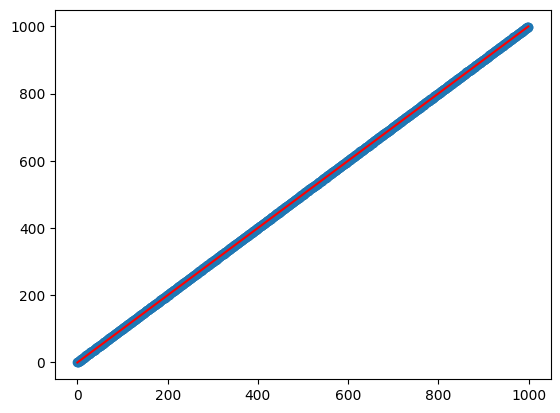

In [169]:
plt.scatter(data[:, 0], data[:, 1])

x_vals = np.sort(data[:, 0])
y_vals = model.predict(x_vals.reshape(-1, 1))

plt.plot(x_vals, y_vals, color='red')
